## Получение реузультатов извлечения терминов для последующей оценки 

### ЗАГРУЗКА  и фильтрация корпуса 

In [1]:
import pandas as pd

In [2]:
from corpus_utils import load_habr_corpus, validate_tag

In [97]:
from eval_utils import Evaluator, EvalData, make_eval_data, are_patterns_match

In [167]:
validate_tag("О!   Привет медвед")

'О Привет медвед'

In [4]:
habr_corpus = load_habr_corpus(limit=None, min_keywords=3)

In [5]:
len(habr_corpus)

1272

In [6]:
habr_corpus.sort(key=lambda p:-len(p['text']))

In [7]:
min_text_len = 10000

for i in range(len(habr_corpus)-1, 0-1, -1):
#     print(i)
    if len(habr_corpus[i]['text']) < min_text_len:
        del habr_corpus[i]

In [8]:
text_lens = [len(p['text']) for p in habr_corpus]
len(text_lens)

736

In [9]:
min(text_lens), max(text_lens), sum(text_lens)/len(text_lens)

(10002, 259880, 22453.264945652172)

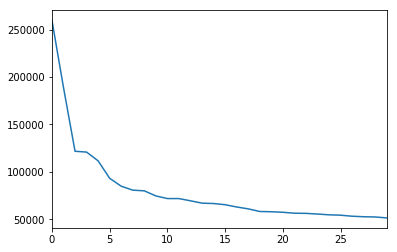

In [13]:
pd.Series(text_lens[:30]).plot()

In [11]:
len(habr_corpus[20]['text'])

57441

In [25]:
%%time

! python text_utils.py

/home/user/miniconda3/lib/python3.6/re.py:212: FutureWarning: split() requires a non-empty pattern match.
  return _compile(pattern, flags).split(string, maxsplit)
Removed 152 terms matched the stopwords.
Removed 75 fake (non-russian) terms.
317 total terms removed while joining & filtering.
freq ...	stdev-10s (58p)...  stdev-30s (19p)...  stdev-50s (11p)...  stdev-70s (8p)...  run done.
dict_keys(['freq', 'stdev-10s', 'stdev-30s', 'stdev-50s', 'stdev-70s'])
('freq', [('класс', 58), ('подкласс', 35), ('паттерн', 32), ('объект', 29), ('фабричный метод', 27), ('интерфейс', 25), ('метод', 25), ('книга', 21), ('пример', 19), ('кот', 19), ('клиентский код', 18), ('наследование', 17), ('код', 15), ('принцип', 15), ('программа', 14), ('проблема', 12), ('изменение', 12), ('базовый класс', 11), ('общий интерфейс', 10), ('работа', 9), ('композиция', 9), ('суперкласс', 9), ('конкретное класс', 9), ('фреймворка', 9), ('базовый метод', 8), ('часть', 8), ('поведение', 8), ('отношение', 8), ('новые',

In [26]:
# {'std-t-90-m8': {'name': 'std-t-90-m8', 'count': 1, 'map@': {1: 1.0, 2: 1.0, 3: 1.0, 5: 0.96, 10: 0.850873015873016, 25: 0.7818135172674952, 20: 0.8095196727936667, 30: 0.7633581339950696, 40: 0.7217216709696588, 50: 0.6752769117739749, 75: 0.5849596812376089, 100: 0.5218178689776152, 125: 0.4749565217712892}}, 'std-tn-68-m8': {'name': 'std-tn-68-m8', 'count': 1, 'map@': {1: 1.0, 2: 1.0, 3: 1.0, 5: 0.9099999999999999, 10: 0.825873015873016, 25: 0.7538196678166662, 20: 0.7727344003176047, 30: 0.7390514410029626, 40: 0.7137438134867387, 50: 0.6769129544980547, 75: 0.5960646577727814, 100: 0.5334653698230665, 125: 0.4853218998985206}}, 'std-tn-st-68-m8': {'name': 'std-tn-st-68-m8', 'count': 1, 'map@': {1: 1.0, 2: 1.0, 3: 1.0, 5: 0.9099999999999999, 10: 0.825873015873016, 25: 0.7538196678166662, 20: 0.7727344003176047, 30: 0.7390514410029626, 40: 0.7137438134867387, 50: 0.6769129544980547, 75: 0.5960646577727814, 100: 0.5334653698230665, 125: 0.4854641474091892}}, 'freq': {'name': 'freq', 'count': 1, 'map@': {1: 1.0, 2: 1.0, 3: 0.8888888888888888, 5: 0.8433333333333334, 10: 0.8259920634920634, 25: 0.7031478888291379, 20: 0.7333904416876551, 30: 0.6883847992685989, 40: 0.6526839946441267, 50: 0.617544721150288, 75: 0.5485361583926295, 100: 0.49577526661762955, 125: 0.45464244356875383}}}

In [123]:
k = 5
0 < k < 10

True

In [4]:
from text_utils import Chapter

In [5]:
work_chapter = Chapter()

In [6]:
import pickle

In [19]:
stats = work_chapter.run_on_text(habr_corpus[90]["text"], parts_list=list(range(30,90+1,20)))
stats.keys()

/home/user/miniconda3/lib/python3.6/re.py:212: FutureWarning: split() requires a non-empty pattern match.
  return _compile(pattern, flags).split(string, maxsplit)


Removed 96 terms matched the stopwords.
Can`t join (to {'перезагрузка'} ): 	начало.
Removed 29 fake (non-russian) terms.
176 total terms removed while joining & filtering.
freq ...	stdev-30p (30p)...  stdev-50p (50p)...  stdev-70p (70p)...  stdev-90p (90p)...  run done.


dict_keys(['freq', 'stdev-30p', 'stdev-50p', 'stdev-70p', 'stdev-90p'])

In [18]:
habr_corpus[0].keys()

dict_keys(['id', 'title', 'text', 'keywords'])

In [38]:
GOOD_TEXT_SIZE = 100000

def eval_data4article(chapter, article, corpus=None, sentences_per_part_list=None, parts_list=None):
    """
    article (dict):
         словарь должен иметь поля:
             text
             keywords
             title (необязательно)
             abstract (необязательно)
     returns list(EvalData`s):
         Объект EvalData для каждого имени алгоритма и для каждого доступного этому алгоритму способа проверки.
         
    """
    res_list = []
    another_article_data = dict()
    text = article["text"]
    if len(text) < GOOD_TEXT_SIZE:
        if corpus:
            i = 0 # при декременте станет -1, -2, ...
            while len(text) < GOOD_TEXT_SIZE:
                i -= 1
                aa = corpus[i]  # another_article
                another_text = aa["text"]
                for key in ("keywords", "title", "abstract")
                    if key in aa:
                        aa_field = aa[key]
                        if key in another_article_data:
                            another_article_data[key] += aa_field
                        else:
                            another_article_data[key] = aa_field
НЕ ТЕСТИРОВАНО                
                
        else:
            n = GOOD_TEXT_SIZE // len(text)
            # повторить текст n раз
            text *= n+1
        
    stats = chapter.run_on_text(text, sentences_per_part_list, parts_list)
#     stats.keys()
    
    for nm in stats:
        ranked_words = [w for w,sc in stats[nm]]
#         # eval with keywordds
#         ed = make_eval_data(ranked_words, article["keywords"], nm)
#         res_list.append(ed)
#         # eval with Title of article
#         title_words = validate_tag(article["title"].lower()).split()
#         ed = make_eval_data(ranked_words, title_words, nm+"-T")
#         res_list.append(ed)
        for key, suffix in [("keywords",''), ("title",'-T'), ("abstract",'-A')]:
            if key not in article:
                continue
            expert = article[key]
            if type(expert) is str:
                expert = validate_tag(expert.lower())
                if not expert:
                    continue
                expert = set(expert.split())
            ed = make_eval_data(ranked_words, expert, nm+suffix)
            res_list.append(ed)
            
    return res_list
    

In [16]:
ed_list = eval_data4article(work_chapter, habr_corpus[94], list(range(30,90+1,20)))

/home/user/miniconda3/lib/python3.6/re.py:212: FutureWarning: split() requires a non-empty pattern match.
  return _compile(pattern, flags).split(string, maxsplit)


Removed 28 terms matched the stopwords.
Removed 41 fake (non-russian) terms.
74 total terms removed while joining & filtering.
freq ...	stdev-30 ...	stdev-50 ...	stdev-70 ...	stdev-90 ...	done.


In [17]:
def eval_data4articles(chapter, articles, sentences_per_part_list=None, parts_list=None):
    """
    articles list(dict):
         словарь : см. eval_data4article()
     returns list(EvalData`s)
    """
    res_list = []
    for i,a in enumerate(articles):
        print("#> Evaluating at article №",i, '...')
        ed_list = eval_data4article(work_chapter, a, sentences_per_part_list, parts_list)
        res_list.extend(ed_list)

    return res_list

In [39]:
%%time

ed_list = eval_data4articles(work_chapter, habr_corpus[10:21], [8,12,20,30,50,80])

#> Evaluating at article № 0 ...


/home/user/miniconda3/lib/python3.6/re.py:212: FutureWarning: split() requires a non-empty pattern match.
  return _compile(pattern, flags).split(string, maxsplit)


Removed 215 terms matched the stopwords.
Can`t join (zero max rank): 	дело , день , .
Removed 166 fake (non-russian) terms.
453 total terms removed while joining & filtering.
freq ...	stdev-8s (160p)...  stdev-12s (107p)...  stdev-20s (64p)...  stdev-30s (42p)...  stdev-50s (25p)...  stdev-80s (16p)...  run done.
#> Evaluating at article № 1 ...
Removed 78 terms matched the stopwords.
Removed 1086 fake (non-russian) terms.
1207 total terms removed while joining & filtering.
freq ...	stdev-8s (193p)...  stdev-12s (128p)...  stdev-20s (77p)...  stdev-30s (51p)...  stdev-50s (30p)...  stdev-80s (19p)...  run done.
#> Evaluating at article № 2 ...
Removed 170 terms matched the stopwords.
Removed 123 fake (non-russian) terms.
373 total terms removed while joining & filtering.
freq ...	stdev-8s (119p)...  stdev-12s (79p)...  stdev-20s (47p)...  stdev-30s (31p)...  stdev-50s (19p)...  stdev-80s (11p)...  run done.
#> Evaluating at article № 3 ...
Removed 251 terms matched the stopwords.
Remov

In [40]:
len(ed_list)

147

In [8]:
# ev = Evaluator(morph=work_chapter._Chapter__extract_terms.morph)
ev = Evaluator(morph=work_chapter.get_morph())


In [41]:
%%time

eval_stats_dict = ev.map_at_ks([1,2,3,5,10,15,20,35,50,75,100], ed_list, quiet=True)

CPU times: user 1.5 s, sys: 0 ns, total: 1.5 s
Wall time: 1.5 s


In [42]:
next(iter(eval_stats_dict.items()))

('freq',
 {1: {'count': 11, 'map': 0.09090909090909091},
  2: {'count': 11, 'map': 0.06818181818181818},
  3: {'count': 11, 'map': 0.06565656565656565},
  5: {'count': 11, 'map': 0.07575757575757575},
  10: {'count': 11, 'map': 0.07028138528138529},
  15: {'count': 11, 'map': 0.06467149012603558},
  20: {'count': 11, 'map': 0.05961394689371047},
  35: {'count': 11, 'map': 0.04855525236085308},
  50: {'count': 11, 'map': 0.04216854641347124},
  75: {'count': 11, 'map': 0.035555327589461186},
  100: {'count': 11, 'map': 0.031468256636469086}})

In [43]:
reform_stats = {nm:{k:eval_stats_dict[nm][k]["map"] for k in eval_stats_dict[nm]}
                for nm in eval_stats_dict
                if '-T' not in nm
               }
reform_stats_T = {nm:{k:eval_stats_dict[nm][k]["map"] for k in eval_stats_dict[nm]}
                for nm in eval_stats_dict
                if '-T' in nm
               }
next(iter(reform_stats.items()))

('freq',
 {1: 0.09090909090909091,
  2: 0.06818181818181818,
  3: 0.06565656565656565,
  5: 0.07575757575757575,
  10: 0.07028138528138529,
  15: 0.06467149012603558,
  20: 0.05961394689371047,
  35: 0.04855525236085308,
  50: 0.04216854641347124,
  75: 0.035555327589461186,
  100: 0.031468256636469086})

In [ ]:
df = pd.DataFrame(reform_stats)
# df = df.transpose()
# df

df.plot(title='y = mean average_precision@x')

In [ ]:
df

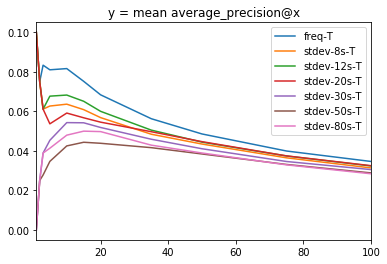

In [36]:
# Статьи 10..21 из top-21 по длине статей с хабра, title. Числа - в предложениях на part.

In [46]:
# Удлинённые ПОВТОРЕНИЕМ Статьи 10..21 из top-21 по длине статей с хабра, tags+hubs.
# Таблица к графику ниже

,freq,stdev-8s,stdev-12s,stdev-20s,stdev-30s,stdev-50s,stdev-80s
1,0.090909,0.090909,0.090909,0.181818,0.181818,0.090909,0.000000
2,0.068182,0.068182,0.090909,0.136364,0.136364,0.090909,0.022727
3,0.065657,0.065657,0.080808,0.111111,0.111111,0.080808,0.025253
5,0.075758,0.072121,0.081212,0.091212,0.094848,0.064848,0.031515
10,0.070281,0.063892,0.071872,0.070624,0.073957,0.053781,0.032471
15,0.064671,0.054391,0.062070,0.059283,0.062909,0.048486,0.035802
20,0.059614,0.051140,0.055108,0.054074,0.056302,0.045952,0.035421
35,0.048555,0.043832,0.046490,0.045600,0.047683,0.042002,0.034082
50,0.042169,0.039326,0.040985,0.040644,0.042320,0.037881,0.032803
75,0.035555,0.033778,0.034611,0.035071,0.036045,0.032920,0.030161


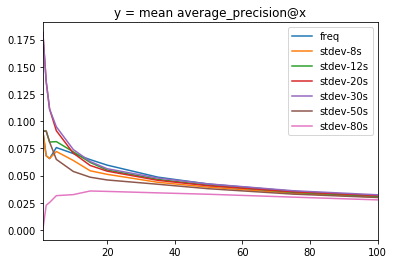

In [45]:
# Удлинённые ПОВТОРЕНИЕМ Статьи 10..21 из top-21 по длине статей с хабра, tags+hubs. (Таблица выше)

In [33]:
# Таблица к графику ниже

,freq,stdev-8s,stdev-12s,stdev-20s,stdev-30s,stdev-50s,stdev-80s
1,0.090909,0.090909,0.181818,0.181818,0.090909,0.090909,0.000000
2,0.068182,0.068182,0.136364,0.136364,0.090909,0.090909,0.022727
3,0.065657,0.065657,0.111111,0.111111,0.080808,0.080808,0.025253
5,0.075758,0.067576,0.099394,0.094848,0.076667,0.064848,0.031515
10,0.070281,0.060321,0.076003,0.070902,0.066165,0.053781,0.035689
15,0.064671,0.053313,0.065660,0.062260,0.060073,0.048054,0.037948
20,0.059614,0.049046,0.058366,0.056307,0.055219,0.045400,0.037582
35,0.048555,0.041897,0.047644,0.045548,0.046344,0.041573,0.035673
50,0.042169,0.037929,0.041681,0.040779,0.041808,0.037655,0.034072
75,0.035555,0.033234,0.034873,0.035422,0.035687,0.032721,0.030886


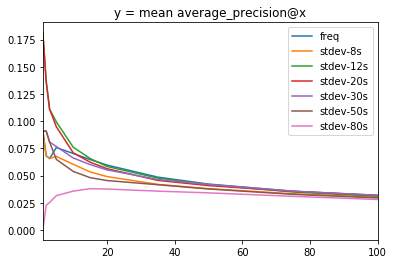

In [32]:
# Статьи 10..21 из top-21 по длине статей с хабра, tags+hubs. Числа - в предложениях на part.

In [ ]:
# изменил интерфейс, добавил длины франметов в предложениях текста, напр.:
# сhapter.run_on_text(txt, sentences_per_part_list=[5,10,20,40,80])

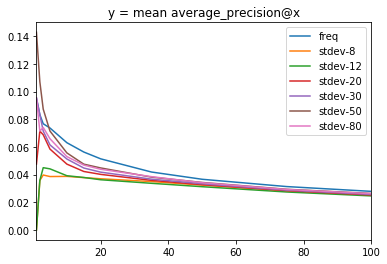

In [105]:
# Хабр по tags+hubs. 21 пост с длиной свыше 60000 символов

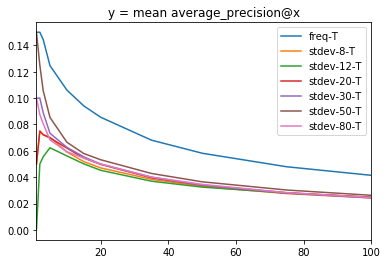

In [103]:
# Хабр по title. 21 пост с длиной свыше 60000 символов

## Оценка полученных результатов (версия для разработки)

In [355]:
"RELOAD MODULE FROM CHANGED FILE"
import eval_utils
from imp import reload         # Импортировать функцию reload (в 3.0)
reload(eval_utils)                 # Загрузить обновленный модуль
eu = eval_utils

make_eval_data = eval_utils.make_eval_data
# eval_utils.make_eval_data

In [219]:
eu

<module 'eval_utils' from '/home/user/dev/concepts/eval_utils.py'>

In [391]:
# path = "result/cylen_110_of116_[Raed].pkl"
path = "result/cylen_82_of82_[Raed].pkl"

raED_list = eu.load_data(path)

In [392]:
raED_list[0].subject

'obespechenie-zhiznesposobnosti-informatsii-vo-vremeni-pri-ee-obrabotke-v-sppr'

In [393]:
ed_list = []

for raED in raED_list:
    ed_list.extend( raED.to_EvalData_list(use_short_labels=False) )
    print('.', end='')
print()

len(ed_list)

..................................................................................


656

In [394]:
for ed in ed_list:
    L = len(ed.test)
    if L<1:
        print(L, ed.expert)

0 abstract
0 abstract


In [356]:
ev = eu.Evaluator(morph=work_chapter.get_morph())

Warning. Evaluator.set_morph(): invalid morph object! Provided: <class 'NoneType'>


In [395]:
MAX_TOP_N = 60

ed_by_expt = {}
expt_set = {ed.expert for ed in ed_list}

def ed_valid(ed, expert):
    return ed.expert==expert and len(ed.ranked)>=MAX_TOP_N and len(ed.test)>0

for expert in expt_set:
    ed_by_expt[expert] = [ed for ed in ed_list if ed_valid(ed,expert)]
    print(len(ed_by_expt[expert]), "cases for", expert)

expt_set.clear()
ed_by_expt.keys()

161 cases for abstract
163 cases for title
163 cases for topic
163 cases for keywords


dict_keys(['abstract', 'title', 'topic', 'keywords'])

In [396]:
f1_stats = {}
for expert in ed_by_expt:
    f1_stats[expert] = {}
    print("\n",expert, end='')
    for k in range(1,MAX_TOP_N+1):
        print('.', end='')
        st = ev.f1_at_k(k, ed_by_expt[expert], quiet=1)
        f1_stats[expert][k] = st # list(st.values())[0]



 abstract............................................................
 title............................................................
 topic............................................................
 keywords............................................................

In [397]:
f1_stats['topic']

{1: {'freq': 0.0, 'stdev-40': 0.0},
 2: {'freq': 0.0, 'stdev-40': 0.0},
 3: {'freq': 0.0, 'stdev-40': 0.0},
 4: {'freq': 0.0, 'stdev-40': 0.0},
 5: {'freq': 0.0, 'stdev-40': 0.0},
 6: {'freq': 0.0, 'stdev-40': 0.0},
 7: {'freq': 0.0, 'stdev-40': 0.0},
 8: {'freq': 0.0, 'stdev-40': 0.0},
 9: {'freq': 0.0, 'stdev-40': 0.0},
 10: {'freq': 0.0, 'stdev-40': 0.0},
 11: {'freq': 0.0016260162601626016, 'stdev-40': 0.0},
 12: {'freq': 0.001524390243902439, 'stdev-40': 0.0},
 13: {'freq': 0.0014347202295552368, 'stdev-40': 0.0},
 14: {'freq': 0.0013550135501355014, 'stdev-40': 0.0},
 15: {'freq': 0.0012836970474967909, 'stdev-40': 0.0},
 16: {'freq': 0.0012195121951219512, 'stdev-40': 0.0},
 17: {'freq': 0.0011614401858304297, 'stdev-40': 0.0},
 18: {'freq': 0.0011086474501108645, 'stdev-40': 0.0},
 19: {'freq': 0.0010604453870625662, 'stdev-40': 0.0},
 20: {'freq': 0.0010162601626016261, 'stdev-40': 0.0},
 21: {'freq': 0.000975609756097561, 'stdev-40': 0.0},
 22: {'freq': 0.0009380863039399625,

In [385]:
def plot_stats(data, title):
    pd.DataFrame(data).transpose().plot(title=title)


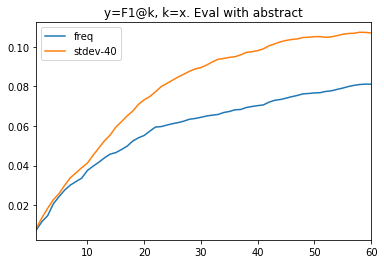

In [398]:
key = "abstract"
plot_stats(f1_stats[key], title="y=F1@k, k=x. Eval with "+key)

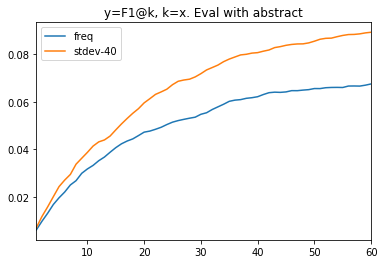

In [387]:
# 110/116

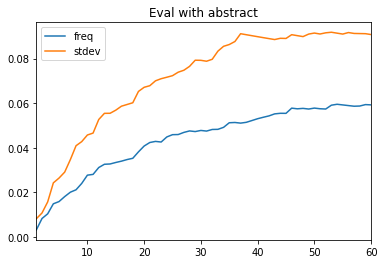

In [359]:
# 20/110

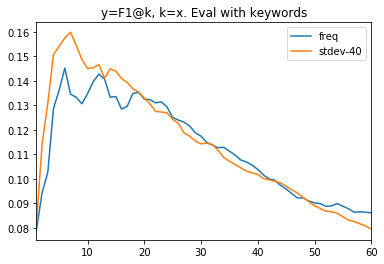

In [399]:
key = "keywords"
plot_stats(f1_stats[key], title="y=F1@k, k=x. Eval with "+key)

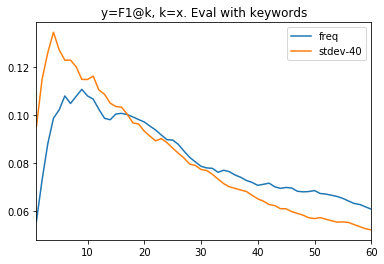

In [388]:
# 110/116

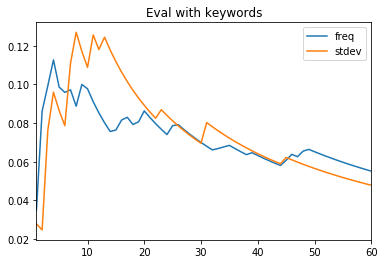

In [360]:
# 20/110

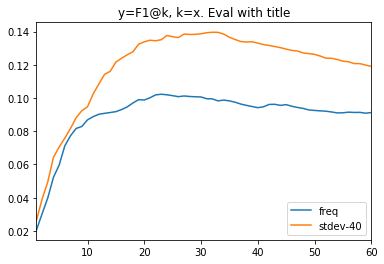

In [400]:
key = "title"
plot_stats(f1_stats[key], title="y=F1@k, k=x. Eval with "+key)

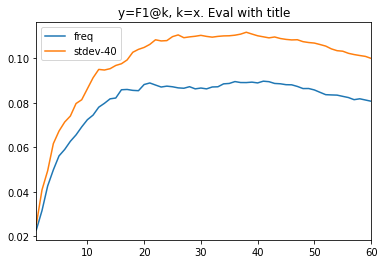

In [390]:
# 110/116

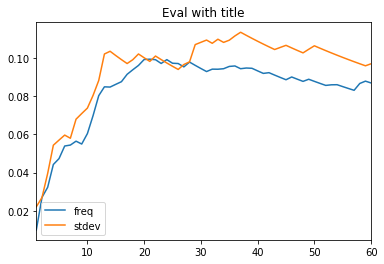

In [361]:
# 20/110

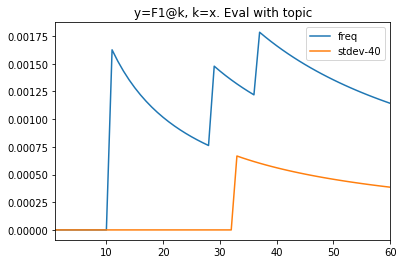

In [401]:
key = "topic"
plot_stats(f1_stats[key], title="y=F1@k, k=x. Eval with "+key)

In [ ]:
file_freq  = './result/result_patterns-125-freq.pkl'
file_stdev = './result/result_patterns-125-std.pkl'

ranked_terms = {
#     "stdev55-m10!" : file_stdev,
#     "stdev55" : 'result_patterns-125-stdev-55parts.pkl',
#     "stdev35" : 'result_patterns-125-stdev-35parts.pkl',
#     "stdev25" : 'result_patterns-125-stdev-25parts.pkl',
#     "stdev20" : 'result_patterns-125-stdev-20parts.pkl',
#     "stdev17" : 'result_patterns-125-stdev-17parts.pkl',
#     "stdev15" : 'result_patterns-125-stdev-15parts.pkl',
#     "stdev70" : 'result_patterns-125-stdev-70parts.pkl',
#     "stdev93" : 'result_patterns-125-stdev-93parts.pkl',
#     "std112-m4" : 'result/patterns-125-min4-stdev-112parts.pkl',
#     "std112-m6" : 'result/patterns-125-min6-stdev-112parts.pkl',
#     "std112-m8" : 'result/patterns-125-min8-stdev-112parts.pkl',
#     "std112-m10" : 'result/patterns-125-min10-stdev-112parts.pkl',
#     "std187-m10" : 'result/patterns-125-min10-stdev-187parts.pkl',
#     "std-t-55-m8" : 'result/patterns-125-min8-stdev-t-55parts.pkl',
#     "std-55-m10" : 'result/patterns-125-min10-stdev-55parts.pkl',
#     "std-55-m6" : 'result/patterns-125-min6-stdev-55parts.pkl',
#     "std-55-m4" : 'result/patterns-125-min4-stdev-55parts.pkl',
#     "std-55-m2" : 'result/patterns-125-min2-stdev-55parts.pkl',
#     "std-55-m1" : 'result/patterns-125-min1-stdev-55parts.pkl',
#     "std-t-134-m10" : 'result/patterns-125-min10-stdev-t-134parts.pkl',
    "std-t-90-m8" : 'result/patterns-125-min8-stdev-t-90parts.pkl',
#     "std-t-68-m8" : 'result/patterns-125-min8-stdev-t-68parts.pkl',
#     "std-tn-68-m8" : 'result/patterns-125-min8-stdev-tn-68parts.pkl',
#     "std-tn-st-68-m8" : 'result/patterns-125-min8-stdev-tn-newstops-68parts.pkl',
    "def-ptt-m2" : 'result/patterns-162-min2-def-ptt.pkl',

    "freq" : file_freq,
}

# for name in ranked_terms:
#     fpath = ranked_terms[name]
#     ranked_terms[name] = load_data(fpath)
    
    
len(ranked_terms)

In [171]:
raed = eu.RankingEvalData("patterns")

for name in ranked_terms:
    fpath = ranked_terms[name]
    ranked = load_data(fpath)
    ranked = [w for w,sc in ranked]
    raed.rankings[name] = ranked
    


In [172]:
ranked_terms.keys()


dict_keys(['std-t-90-m8', 'def-ptt-m2', 'freq'])

In [196]:
# Загрузка "эталонных" терминов из файла
# ! слова в составных терминах (словосочетаниях) разделены "::"

word_colloc_sep = "::"

experts_terms_file = "../texts/" + "it_concept_list.txt"

with open(experts_terms_file,'r') as file:
    words = file.read().split()
#         loaded_corpus_word_groups.append( line.split(" ") )

singleword_expert_terms = {w for w in words if word_colloc_sep not in w}
multiword_expert_terms = {tuple(w.split(word_colloc_sep)) for w in words if word_colloc_sep in w}

for s in [singleword_expert_terms,multiword_expert_terms]:
    print(len(s))
    print(s)

46
{'паттерн', 'строитель', 'интерфейс', 'код', 'мост', 'приспособленец', 'итератор', 'архитектура', 'дизайн', 'модуль', 'декоратор', 'проектирование', 'команда', 'объектно-ориентированный', 'посредник', 'инкапсуляция', 'метакласс', 'технология', 'легковес', 'методология', 'парадигма', 'адаптер', 'синглтон', 'снимок', 'экземпляр', 'одиночка', 'синтаксис', 'тип', 'компоновщик', 'процедура', 'ооп', 'субкласс', 'фасад', 'суперкласс', 'инстанцировать', 'класс', 'подкласс', 'заместитель', 'прототип', 'программирование', 'объект', 'стратегия', 'метод', 'посетитель', 'состояние', 'наблюдатель'}
13
{('язык', 'программирования'), ('цепочка', 'обязанностей'), ('абстрактная', 'фабрика'), ('порождающий', 'паттерн'), ('объектно-ориентированное', 'программирование'), ('структурный', 'паттерн'), ('процедурное', 'программирование'), ('поведенческий', 'паттерн'), ('шаблонный', 'метод'), ('базовый', 'класс'), ('структурное', 'программирование'), ('фабричный', 'метод'), ('абстрактный', 'класс')}


In [174]:
expert_terms = list(singleword_expert_terms) + list(multiword_expert_terms)

len(expert_terms)

59

In [175]:
raed.test_sets["expert"] = expert_terms

In [176]:
raed.rankings.keys()

dict_keys(['std-t-90-m8', 'def-ptt-m2', 'freq'])

In [177]:
raed.get_filename()

'patterns_SDF-E_RaED.pkl'

In [178]:
eval_data_list = raed.to_EvalData_list()

In [179]:
eval_data_list[2] # ['std-t-90-m8']

EvalData(name='patterns-F-E', test=['паттерн', 'строитель', 'интерфейс', 'код', 'мост', 'приспособленец', 'итератор', 'архитектура', 'дизайн', 'модуль', 'декоратор', 'проектирование', 'команда', 'объектно-ориентированный', 'посредник', 'инкапсуляция', 'метакласс', 'технология', 'легковес', 'методология', 'парадигма', 'адаптер', 'синглтон', 'снимок', 'экземпляр', 'одиночка', 'синтаксис', 'тип', 'компоновщик', 'процедура', 'ооп', 'субкласс', 'фасад', 'суперкласс', 'инстанцировать', 'класс', 'подкласс', 'заместитель', 'прототип', 'программирование', 'объект', 'стратегия', 'метод', 'посетитель', 'состояние', 'наблюдатель', ('язык', 'программирования'), ('цепочка', 'обязанностей'), ('абстрактная', 'фабрика'), ('порождающий', 'паттерн'), ('объектно-ориентированное', 'программирование'), ('структурный', 'паттерн'), ('процедурное', 'программирование'), ('поведенческий', 'паттерн'), ('шаблонный', 'метод'), ('базовый', 'класс'), ('структурное', 'программирование'), ('фабричный', 'метод'), ('абст

In [180]:
ev = Evaluator(morph=work_chapter.get_morph())

# ev.calc_relevence_list_at_k(40)

# print("k \tp@k \t \tap@k")

# for k in (1,2,3,5,10,20,30,40):
#     print("%d \t%5f \t%5f" % (k, ev.precision_at_k(k), ev.average_precision_at_k(k)))

# stats_dict = ev.ap_at_ks((1,2,3,5,10,20,30,40), eval_data_list)
stats_dict = ev.ap_at_ks(list(range(1,125+1)), eval_data_list)

# del ev


patterns-S-E... patterns-D-E... patterns-F-E... 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 

In [187]:
f1_sts = {k: ev.f1_at_k(k, eval_data_list, quiet=True) for k in range(3,91,1)}

df1 = pd.DataFrame(f1_sts)
df1 = df1.transpose()
# df1["y=kx"] = [n/100 for n in df1.index]
# df1
# list(df1.index)

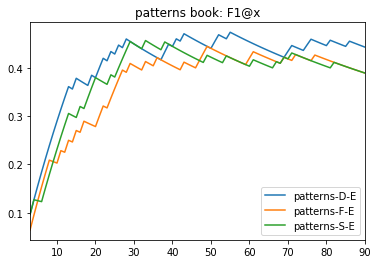

In [188]:
_ = df1.plot(title="patterns book: F1@x")

In [189]:
df = pd.DataFrame(stats_dict)
df = df.transpose()
df.loc[[1,2,3,4,5,7,10,15,20,25,30,40,50,70,90,120]]
# df

,patterns-D-E,patterns-F-E,patterns-S-E
1,1.000000,1.000000,1.000000
2,1.000000,1.000000,1.000000
3,1.000000,0.888889,1.000000
4,1.000000,0.854167,1.000000
5,1.000000,0.843333,0.960000
7,1.000000,0.843878,0.882993
10,1.000000,0.825992,0.850873
15,0.990794,0.777046,0.835030
20,0.943884,0.733390,0.809520
25,0.904858,0.703148,0.781814


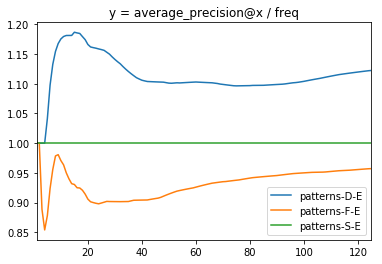

In [193]:
# df - df["freq"]
base_k = "patterns-S-E"
df_2 = pd.DataFrame()
for k in df.keys():
    df_2[k] = df[k] / df[base_k]
_ = df_2.plot(title='y = average_precision@x / freq') #  — freq

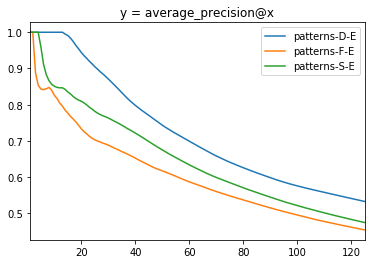

In [194]:
_ = df.plot(title='y = average_precision@x')

In [ ]:
+++
# stats_dict = {k:{n:stats_dict[k][n] for n in stats_dict[k] if 'dev55' not in n} for k in stats_dict}

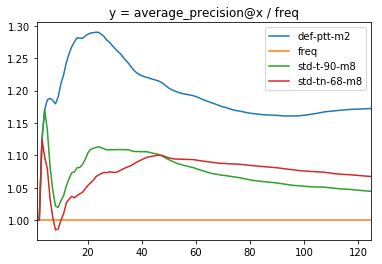

In [17]:
# Относительная точность (делением на график freq) (смотрится лучше!)

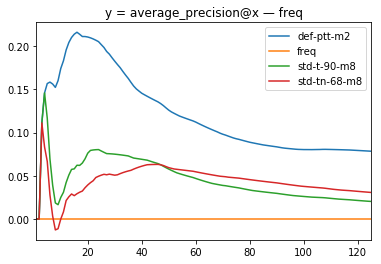

In [20]:
# в сравнении с графиком freq (разность всех с ним) (нагляднее!)

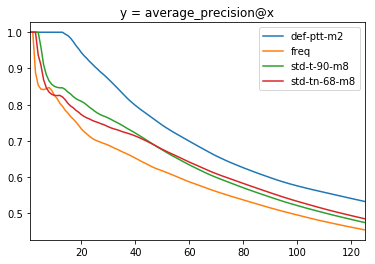

In [54]:
# Первая проба анализа при помощи паттернов дефиниций

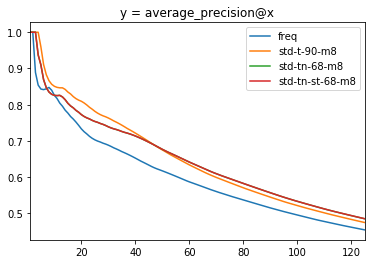

In [289]:
# для презентации (пред-пред-защита)

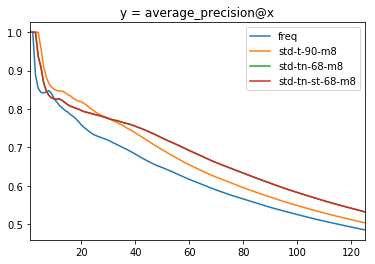

In [274]:
# дополнил стоп-слова словами "любой", "лет".
#  в рез-те слово "люба" ушло из терминов, а "лёт" -- нет.
# Заметного прироста нет. Он есть, но чисто формальный, на пару микрон.

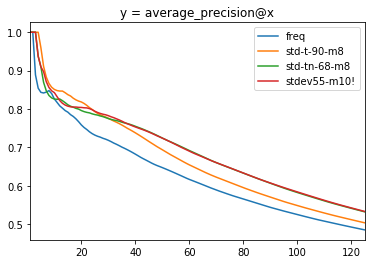

In [263]:
# tn - вспомнил, что std() ряда умножал на длину (число слов) многословного термина
# в итоге качество заметно возросло (и достигло stdev55 - то, что было до потери кода в ячейках)

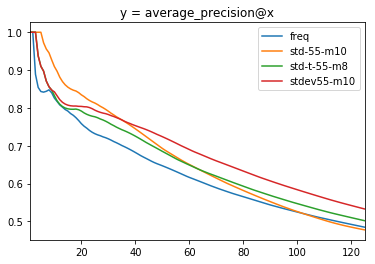

In [236]:
# std-t : подал t вместо t.normalized в:
#     main_chapter.profile4word_or_family(t)

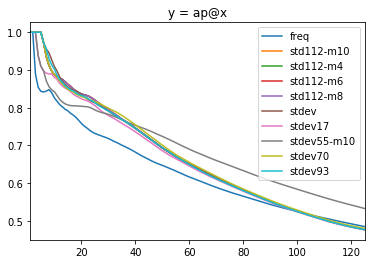

In [164]:
# проверка зависимости от величины затравки, взятой по нижнему порогу частоты (min 4,6,8,10)

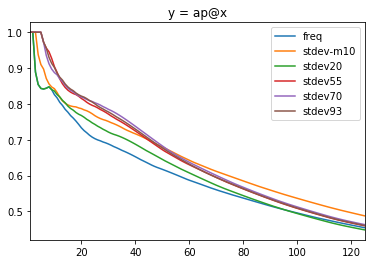

In [151]:
# после дополнения эталонного списка 5-6 терминами

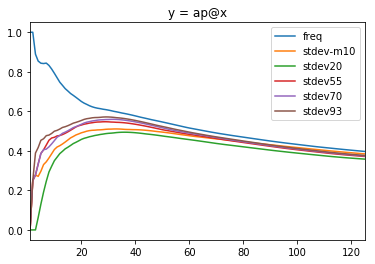

In [141]:
# после исправления бага в ap@k(): последний шаг с i=k пропускался

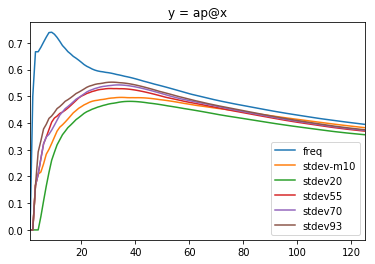

In [125]:
# до изменения эталонного набора (хочу пополнить всеми названиями паттернов)

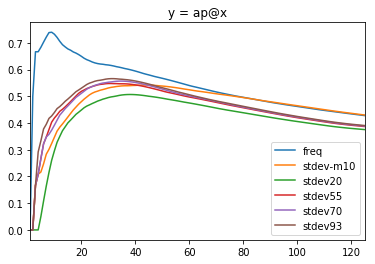

In [120]:
# до установки релевантности жёстко в {0,1}

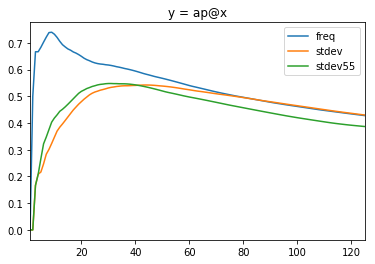

In [108]:
# второй график для ap@k: терминов для stdev взято больше (373)

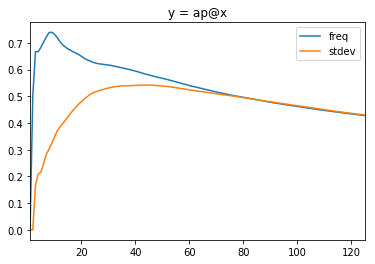

In [101]:
# самый первый график для ap@k: термины для stdev взяты те же 125, что и для freq

In [124]:
t = ("name", 2, 5)
t[1:3]


(2, 5)

### F-мера (F1 score) ###
представляет собой совместную оценку точности и полноты. Данная метрика вычисляется по следующей формуле:

`F-мера = 2 * Точность * Полнота / (Точность + Полнота)`

In [2]:
# init once
# f1_stats = {}


In [ ]:
# пока поддерживаются только однословные термины
# signleword_experts_terms = [t for t in experts_terms  if word_colloc_sep not in t]

# проверим отдельные слова составных терминов и засчитаем совпадения как долю от числа слов во фразе

# len(signleword_experts_terms) # 44

print("selected terms:",len(norms))
print("experts terms:",len(experts_terms))


hit_count = 0 # sum([1 if w in signleword_experts_terms else 0  for w in norms]);
for t in experts_terms:
    term_subwords = t.split(word_colloc_sep);
    for w in norms:
        if w in term_subwords:
            hit_count += 1 / len(term_subwords);
        
print("hit_count:",hit_count)

precision = hit_count / len(norms);
print("precision:",precision)

recall = hit_count / len(experts_terms);
print("recall:",recall)

f1_measure = (2 * precision * recall) / (precision + recall)
print("f1:",f1_measure)

f1_stats[len(norms)] = {
    "1) selected terms": len(norms),
    "2) experts terms" : len(experts_terms),
    "3) hit_count" : hit_count,
    "4) precision" : precision,
    "5) recall" : recall,
    "6) f1_measure" : f1_measure
}


In [ ]:
f1_stats

In [ ]:
# graph now!

points = [ (f1_stats[x]["4) precision"] ,
            f1_stats[x]["5) recall"] ,
            str(round(f1_stats[x]['3) hit_count'] - 0.01))) # +'\n——\n '+str(f1_stats[x]['1) selected terms']))
          for x in f1_stats ]
points.sort(key=lambda x:x[1]/x[0]) # like arctan(x/y)
# matplotlib.

pyplot.plot([p[0] for p in points], [p[1] for p in points], "o", label="hits")
pyplot.xlabel('precision')
pyplot.ylabel('recall')
pyplot.legend()

for p in points:
    pyplot.annotate(p[2], xy=(p[0], p[1]),  xycoords='data',
            xytext=(p[0]+0.001, p[1]+0.004), # textcoords='axes fraction',
#             arrowprops=dict(facecolor='grey', shrink=0.2, width=1, headwidth=7),
            horizontalalignment='left', verticalalignment='bottom',
            )

In [257]:
True & False

False